The goal here is to look into the people that tweet because of the hashtag. What do they generally look like? Generate descriptive statistics (both network and Twitter based) and contrast them with other user types.

In [1]:
from imports import * 

In [2]:
campaigns = preprocessing.load_campaign()
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

In [3]:
with open(os.path.join(TWITTER_DATA_DIR, 'n_newly_exposed_by_user.pkl'), 'rb') as f:
    new_exposures = pickle.load(f)

new_exposures_df = pd.DataFrame(pd.DataFrame(new_exposures).T.stack())
new_exposures_df.index = new_exposures_df.index.set_names(['hashtag', 'username'])
new_exposures_df.columns = ['newly_exposed_users']
new_exposures_df.head()

newly_exposed_users
hashtag           username                            
jharkhandwithmodi manojgoelbjp                 13636.0
                  moonmuks                         0.0
                  sanjay_mishra91               1828.0
                  ch_rahul29                     932.0
                  shaileshmishra                2043.0

In [4]:
dfs = []
for hashtag, tweets in tqdm(campaigns.items()):
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        _, df = trending.build_df(hashtag, tweets, exposures, 
                                  raw_df_too=True, include_missing=False, 
                                  cutoff_choice='earliest')
        dfs.append(df.merge(new_exposures_df.reset_index(), on=['username', 'hashtag']))
panel_df = pd.concat(dfs)
panel_df.head()

username                   id   retweet_from template  \
0  bjp4latehar  1172033856607682560                           
1  bjp4latehar  1172027968400445440                           
2  bjp4latehar  1172028765326569472                           
3  bjp4latehar  1172029990159781888                           
4  bjp4latehar  1172086387274743809  bjp4jharkhand            

            retweet_id                                               text  \
0                       ‡§Ü‡§ß‡§æ‡§∞‡§≠‡•Ç‡§§ ‡§∏‡§Ç‡§∞‡§ö‡§®‡§æ ‡§π‡•ã ‡§Ø‡§æ ‡§∂‡§ø‡§ï‡•ç‡§∑‡§æ ‡§Ø‡§æ ‡§´‡§ø‡§∞ ‡§∏‡•ç‡§µ‡§ö‡•ç‡§õ‡§§‡§æ ‡§Ø‡§æ...   
1                       ‡§ù‡§æ‡§∞‡§ñ‡§£‡•ç‡§° ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§ï‡§ø‡§∏‡•Ä ‡§≠‡•Ä ‡§Ü‡§™‡§æ‡§§ ‡§∏‡•ç‡§•‡§ø‡§§‡§ø ‡§Æ‡•á‡§Ç ‡§™‡•Ä‡§°‡§º‡§ø‡§§ ‡§ï...   
2                       ‡§Ö‡§¨ ‡§∞‡§æ‡§ú‡§™‡§§‡•ç‡§∞‡§ø‡§§ ‡§®‡•å‡§ï‡§∞‡§ø‡§Ø‡•ã‡§Ç ‡§ï‡•ã ‡§õ‡•ã‡§°‡§º‡§ï‡§∞ ‡§∏‡§≠‡•Ä ‡§∏‡§∞‡§ï‡§æ‡§∞‡•Ä ‡§®‡•å‡§ï...   
3                       ‡§ù‡§æ‡§∞‡§ñ‡§£‡•ç‡§° ‡§ó‡§†‡§® ‡§ï‡•á ‡§¨‡§æ‡§¶ ‡§™‡§π‡§≤‡•Ä ‡§¨‡§æ‡§∞ ‡§∞‡§ò‡•Å‡§µ‡§∞ ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§®‡•á ‡§∞‡§æ‡§ú...   
4  1172070404157870080  rt @bjp4jharkhand: ‡§Ü‡§ú ‡§ï‡§æ ‡§¶‡§ø‡§® ‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§° ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ê‡§§‡§ø...   

                 date retweets favorites            adj_date             type  \
0 2019-09-12 06:27:01        0         0 2019-09-12 11:57:01          regular   
1 2019-09-12 06:03:37        0         0 2019-09-12 11:33:37          regular   
2 2019-09-12 06:06:47        0         0 2019-09-12 11:36:47          regular   
3 2019-09-12 06:11:39        0         0 2019-09-12 11:41:39          regular   
4 2019-09-12 09:55:45       31         0 2019-09-12 15:25:45  regular_retweet   

  follower_data template_exposure normal_exposure total_exposure  \
0          True               151              64            215   
1          True               151              64            215   
2          True               151              64            215   
3          True               151              64            215   
4          True               151              64            215   

                 time      trending_start inferred_trending_start  \
0 2019-09-12 11:57:01 2019-02-17 15:30:00     2019-02-17 14:30:00   
1 2019-09-12 11:33:37 2019-02-17 15:30:00     2019-02-17 14:30:00   
2 2019-09-12 11:36:47 2019-02-17 15:30:00     2019-02-17 14:30:00   
3 2019-09-12 11:41:39 2019-02-17 15:30:00     2019-02-17 14:30:00   
4 2019-09-12 15:25:45 2019-02-17 15:30:00     2019-02-17 14:30:00   

             hashtag  newly_exposed_users  
0  jharkhandwithmodi                  0.0  
1  jharkhandwithmodi                  0.0  
2  jharkhandwithmodi                  0.0  
3  jharkhandwithmodi                  0.0  
4  jharkhandwithmodi                  0.0

## Network Level Info

In [5]:
network_user_df = pd.read_pickle(os.path.join(TWITTER_DATA_DIR, 'user_network_stats.pkl'))
network_user_df

pr        cc  outdeg  indeg
0001atulrai      0.000003  0.995769    42.0   20.0
0001sudarshan    0.000003  0.279654    86.0   48.0
0006subhash      0.000002  0.339958    76.0    6.0
000fdc0fb7974a7  0.000002  0.549075    29.0    9.0
000pal           0.000002  0.250375   107.0    3.0
...                   ...       ...     ...    ...
___subodh        0.000002  0.338983   457.0   13.0
____daddysgirl   0.000002  0.000000     0.0    0.0
____realpatel__  0.000002  0.275299   196.0   41.0
_____anusha      0.000003  0.396820   177.0   20.0
________alwhdbd  0.000002  0.000000     3.0    1.0

[115597 rows x 4 columns]

In [6]:
# import network_plots, graph_tool.all as gt, gzip
# g = network_plots.load_follower_network()

# pr = gt.pagerank(g).a
# clustering = gt.local_clustering(g).a
# out_degs = g.get_out_degrees(g.get_vertices())
# in_degs = g.get_in_degrees(g.get_vertices())
# usernames = [g.vp.usernames[v] for v in g.vertices()]

# network_user_df = pd.DataFrame([pr,clustering,out_degs,in_degs]).T
# network_user_df.index = usernames
# network_user_df.columns = ['pr', 'cc', 'outdeg', 'indeg']

# network_user_df.to_pickle(os.path.join(TWITTER_DATA_DIR, 'user_network_stats.pkl'))

## Analyzing Users
For each user, how many followers do they have? 

In [7]:
def describe_users(big_df):
    res_dict = {}
    stats = ['# Tweets', '# Followers', '# Campaigns', 'Avg. Retweets', 'Avg. Favorites', 
             'PageRank', 'Clustering Coef.', 'Out-Degree', 'In-Degree', 'Avg. Newly Exposed']
    def get_user_stats(df, mean=False):
        temp = [len(df)]
        username = df.username.iloc[0]
        path = os.path.join(FOLLOWER_DATA_DIR, username + '.gz')
        f = gzip.open(path, 'rb')
        try:
            followers = [x.split('\t')[1] for x in f.read().decode().strip().split('\n')]
            temp.append(len(followers))
        except Exception as e:
            print(e, 'issue with ', username)
            temp.append(-1)
        temp.append(len(df.hashtag.unique()))
        if mean:
            temp.append(df.retweets.mean())
            temp.append(df.favorites.mean())    
        else:
            temp.append(df.retweets.median())
            temp.append(df.favorites.median())    
        temp.append(df.pr.iloc[0])
        temp.append(df.cc.iloc[0])
        temp.append(df.outdeg.iloc[0])
        temp.append(df.indeg.iloc[0])
        temp.append(df.newly_exposed_users.iloc[0])
        res_dict[username] = temp

    big_df.groupby('username').apply(get_user_stats)
    t = pd.DataFrame(res_dict).T
    t.columns = stats
    return t 

In [8]:
big_panel = []
meta_df = []
def helper(df, desc):
    t = describe_users(df)
    t['Group'] = desc 
    big_panel.append(t)
    meta_df.append(
        pd.concat({desc: t.describe()}, names=['User Group']))    

In [9]:
zero_exposure_tweeters = panel_df.query('total_exposure == 0').query('type == "regular"') \
.query('adj_date > inferred_trending_start').join(network_user_df, on='username')

helper(zero_exposure_tweeters, 'Zero-Exposure, Post-Hashtag')

list index out of range issue with  movies_it


In [10]:
zero_exposure_tweeters_pre_trend = panel_df.query('total_exposure == 0').query('type == "regular"') \
    .query('adj_date < inferred_trending_start').join(network_user_df, on='username')
helper(zero_exposure_tweeters_pre_trend,  'Zero-Exposure, Pre-Hashtag')

In [11]:
others = panel_df.query('total_exposure != 0').query('type == "regular"').join(network_user_df, on='username')
helper(others, 'Exposed, Non-Template')

list index out of range issue with  faraktesuresh
list index out of range issue with  kolinilangi
list index out of range issue with  movies_it
list index out of range issue with  shyamsu08245833


In [12]:
templates = panel_df.query('type == "template"').join(network_user_df, on='username')
helper(templates, 'Template')

list index out of range issue with  faraktesuresh
list index out of range issue with  kajal_barge
list index out of range issue with  kolinilangi
list index out of range issue with  shyamsu08245833


In [13]:
res = pd.concat(meta_df)
res.index = res.index.set_names(['User Type', 'Statistic'])
res

# Tweets   # Followers  \
User Type                   Statistic                               
Zero-Exposure, Post-Hashtag count       2093.000000  2.093000e+03   
                            mean           1.568562  2.470716e+04   
                            std            1.391969  3.458384e+05   
                            min            1.000000 -1.000000e+00   
                            25%            1.000000  6.200000e+01   
                            50%            1.000000  2.180000e+02   
                            75%            2.000000  1.089000e+03   
                            max           16.000000  1.310638e+07   
Zero-Exposure, Pre-Hashtag  count        743.000000  7.430000e+02   
                            mean           1.049798  6.362263e+04   
                            std            0.277546  7.365588e+05   
                            min            1.000000  1.000000e+00   
                            25%            1.000000  1.005000e+02   
                            50%            1.000000  3.820000e+02   
                            75%            1.000000  1.538000e+03   
                            max            5.000000  1.310638e+07   
Exposed, Non-Template       count      16328.000000  1.632800e+04   
                            mean          10.967234  2.020173e+04   
                            std           47.054696  2.522333e+05   
                            min            1.000000 -1.000000e+00   
                            25%            1.000000  1.367500e+02   
                            50%            3.000000  4.960000e+02   
                            75%            8.000000  2.095500e+03   
                            max         2230.000000  1.310638e+07   
Template                    count       3234.000000  3.234000e+03   
                            mean          14.452381  1.164627e+04   
                            std           29.805458  1.745905e+05   
                            min            1.000000 -1.000000e+00   
                            25%            1.000000  7.725000e+01   
                            50%            4.000000  3.800000e+02   
                            75%           13.000000  1.745750e+03   
                            max          385.000000  8.654833e+06   

                                        # Campaigns  Avg. Retweets  \
User Type                   Statistic                                
Zero-Exposure, Post-Hashtag count       2093.000000    2083.000000   
                            mean           1.568562       7.798848   
                            std            1.391969      83.119251   
                            min            1.000000       0.000000   
                            25%            1.000000       0.000000   
                            50%            1.000000       0.000000   
                            75%            2.000000       1.000000   
                            max           16.000000    2613.000000   
Zero-Exposure, Pre-Hashtag  count        743.000000     741.000000   
                            mean           1.049798      18.117409   
                            std            0.277546     130.877701   
                            min            1.000000       0.000000   
                            25%            1.000000       0.000000   
                            50%            1.000000       0.000000   
                            75%            1.000000       2.000000   
                            max            5.000000    2036.000000   
Exposed, Non-Template       count      16328.000000   16274.000000   
                            mean           2.288094       6.907306   
                            std            2.310269      94.964928   
                            min            1.000000       0.000000   
                            25%            1.000000       0.000000   
                            50%            1.000000       0.000000   
                

In [14]:
temp = pd.concat(big_panel)

In [21]:
temp.to_pickle(os.path.join(TWITTER_DATA_DIR, 'all_users_by_group_earliest_cutoff.pkl'))
# temp.to_pickle(os.path.join(TWITTER_DATA_DIR, 'all_users_by_group_medians.pkl'))
# temp.to_pickle(os.path.join(TWITTER_DATA_DIR, 'all_users_by_group.pkl'))

In [4]:
temp = pd.read_pickle(os.path.join(TWITTER_DATA_DIR, 'all_users_by_group.pkl'))
temp

# Tweets  # Followers  # Campaigns  Avg. Retweets  \
007_joshh            2.0         40.0          1.0       0.000000   
1984_tweeter         1.0          9.0          1.0       0.000000   
1995subhampaul       1.0        159.0          1.0       0.000000   
1_ndia               6.0         48.0          2.0       0.166667   
1stindianews         1.0     113070.0          1.0       7.000000   
...                  ...          ...          ...            ...   
yuva4namo1           2.0          1.0          1.0       0.000000   
yv4bjp              14.0       2248.0          4.0       0.357143   
zahidpatka          16.0       3231.0          5.0       1.250000   
zalaji_9999          2.0         51.0          1.0       0.000000   
zarrnaj             37.0        254.0          7.0       2.594595   

                Avg. Favorites  PageRank  Clustering Coef.  Out-Degree  \
007_joshh             0.000000  0.000002          0.180662       240.0   
1984_tweeter          0.000000  0.000002          1.000000         3.0   
1995subhampaul        0.000000  0.000002          0.407557        26.0   
1_ndia                0.833333  0.000002          0.400000        37.0   
1stindianews          9.000000  0.000037          0.038084        10.0   
...                        ...       ...               ...         ...   
yuva4namo1            0.500000  0.000002          0.300000         5.0   
yv4bjp                0.571429  0.000003          0.485781        68.0   
zahidpatka            1.812500  0.000007          0.173755         0.0   
zalaji_9999           3.500000  0.000002          0.479273       102.0   
zarrnaj               4.135135  0.000003          0.519737         0.0   

                In-Degree  Avg. Newly Exposed                        Group  
007_joshh             3.0                13.0  Zero-Exposure, Post-Hashtag  
1984_tweeter          0.0                 5.0  Zero-Exposure, Post-Hashtag  
1995subhampaul       13.0                71.0  Zero-Exposure, Post-Hashtag  
1_ndia                8.0                31.0  Zero-Exposure, Post-Hashtag  
1stindianews       2198.0             42120.0  Zero-Exposure, Post-Hashtag  
...                   ...                 ...                          ...  
yuva4namo1            0.0                 0.0                     Template  
yv4bjp              218.0               140.0                     Template  
zahidpatka          439.0               295.0                     Template  
zalaji_9999          12.0                 8.0                     Template  
zarrnaj              96.0                11.0                     Template  

[23020 rows x 11 columns]

## Who are the Pre Hashtag Peeps

In [6]:
premies = temp.query('Group == "Zero-Exposure, Pre-Hashtag"')

In [17]:
temp.index.unique()

Index(['007_joshh', '1984_tweeter', '1995subhampaul', '1_ndia', '1stindianews',
       '300mission', '53b1598bda3740f', '5pjkmepbkte1bam', '60yearscongress',
       '62sandeep',
       ...
       'wazir_akhil', 'witty_daddy', 'yashshukla13199', 'ykmishra54',
       'yogeshk51785358', 'yogidityanath', 'ypv86cmpaxqvhj6', 'yudh4modi',
       'yugalsharma222', 'zalaji_9999'],
      dtype='object', length=18716)

In [15]:
temp['# Tweets'].sum()

249766.0

In [14]:
premies['# Tweets'].sum()/ temp.query('Group == "Zero-Exposure, Post-Hashtag"')['# Tweets'].sum()

0.17110094698189782

In [10]:
premies['# Tweets'].sum()

2656.0

In [9]:
premies.sort_values('Avg. Newly Exposed', ascending=False).head(30)

# Tweets  # Followers  # Campaigns  Avg. Retweets  \
bjp4india            61.0   13106376.0          8.0     647.311475   
amitshah              1.0   12571259.0          1.0    1455.000000   
piyushgoyal           8.0    7178903.0          1.0     527.375000   
adgpi                10.0    3689667.0          1.0     326.300000   
airnewsalerts         6.0    2394145.0          1.0      20.166667   
ianuragthakur         1.0    1553251.0          1.0     180.000000   
bjp4up                1.0    1439094.0          1.0     115.000000   
manojtiwarimp         1.0     912706.0          1.0    1682.000000   
pragyanojha           2.0     813037.0          1.0      18.500000   
republic              4.0     763926.0          1.0      27.500000   
anupmajaisbjp         1.0     459883.0          1.0      27.000000   
bjym                  2.0     412192.0          1.0     427.000000   
jaitdp                1.0     345166.0          1.0    1520.000000   
bjp4rajasthan        12.0     292916.0          1.0     176.666667   
anilvijminister       1.0     272887.0          1.0      86.000000   
kaaryakarta           1.0     246821.0          1.0     385.000000   
manishmittal674       1.0     254473.0          1.0       0.000000   
nehapant19            1.0     259125.0          1.0      17.000000   
sushantbsinha         2.0     135612.0          1.0     199.000000   
bjplive               1.0     130440.0          1.0      36.000000   
maheishgirri          1.0     141354.0          1.0     352.000000   
jualoram              1.0     146384.0          1.0     152.000000   
soniksourabh          1.0      98136.0          1.0       2.000000   
bjp4haryana          24.0      87249.0          1.0      49.541667   
iaadiraj              1.0     124589.0          1.0     191.000000   
amitkalraj            1.0      83920.0          1.0      46.000000   
ani30oct              1.0      76169.0          1.0       1.000000   
milindkhandekar       1.0      93293.0          1.0       8.000000   
menakadoshi           1.0      66130.0          1.0       2.000000   
kajal_jaihind         1.0      60532.0          1.0     255.000000   

                 Avg. Favorites  PageRank  Clustering Coef.  Out-Degree  \
bjp4india           1710.868852  0.002004          0.007457         3.0   
amitshah            4895.000000  0.001061          0.009300       339.0   
piyushgoyal         2191.000000  0.001590          0.012632       611.0   
adgpi               1262.900000  0.000335          0.011391        99.0   
airnewsalerts         82.166667  0.000799          0.012273        18.0   
ianuragthakur        810.000000  0.000750          0.016449       175.0   
bjp4up               206.000000  0.000266          0.029345       147.0   
manojtiwarimp       7364.000000  0.000274          0.037610       443.0   
pragyanojha          256.500000  0.000014          0.046326        52.0   
republic              81.000000  0.001026          0.008468         3.0   
anupmajaisbjp        224.000000  0.000046          0.028168        17.0   
bjym                1518.500000  0.000365          0.024751       164.0   
jaitdp              3200.000000  0.000229          0.030246        11.0   
bjp4rajasthan        260.833333  0.000147          0.048043       131.0   
anilvijminister      112.000000  0.000090          0.034429        79.0   
kaaryakarta          656.000000  0.000217          0.018169         0.0   
manishmittal674        2.000000  0.000023          0.043695        43.0   
nehapant19           303.000000  0.000095          0.016120        37.0   
sushantbsinha        636.000000  0.000095          0.052482       320.0   
bjplive               82.000000  0.000041          0.064134       192.0   
maheishgirri        1134.000000  0.000215          0.052721       691.0   
jualoram             286.000000  0.000186          0.068626       256.0   
soniksourabh           1.000000  0.000015          0.147749        41.0   
bjp4haryana          150.416667  0.000108     

## Table One

In [5]:
user_df = preprocessing.load_user_data()

In [6]:
from tableone import TableOne

In [23]:
cats = ['# Followers', '# Tweets', 'Avg. Retweets', 'Avg. Favorites',
        'PageRank', 'Clustering Coef.', 'Out-Degree', 'In-Degree', 'Avg. Newly Exposed', 
        '# Campaigns', '% Followers Newly Exposed']

In [30]:
temp.loc[:, 'PageRank'] = temp.PageRank.apply(lambda x: x*1_000_000)
temp['% Followers Newly Exposed'] = temp['Avg. Newly Exposed'] / temp['# Followers']
columns_to_display.append('% Followers Newly Exposed')

In [31]:
r = TableOne(temp.reset_index().drop(columns=['index']), columns=[], categorical=[],
             nonnormal=cats, 
             groupby='Group')

In [148]:
r = TableOne(temp.reset_index().drop(columns=['index']), columns=cats, categorical=[],
             nonnormal=[], 
             groupby='Group')

In [32]:
pd.set_option('display.float_format', '{:.2g}'.format)

In [146]:
temp.query('Group == "Template"').describe()

# Tweets  # Followers  # Campaigns  Avg. Retweets  Avg. Favorites  \
count   3.2e+03      3.2e+03      3.2e+03        3.2e+03         3.2e+03   
mean         14      1.2e+04          1.6            4.5              12   
std          30      1.7e+05            2             42         1.6e+02   
min           1           -1            1              0               0   
25%           1           77            1              0               0   
50%           4      3.8e+02            1              0               1   
75%          13      1.7e+03            1            1.5               3   
max     3.8e+02      8.7e+06           26        1.9e+03           8e+03   

       PageRank  Clustering Coef.  Out-Degree  In-Degree  Avg. Newly Exposed  \
count   3.2e+03           3.2e+03     3.2e+03    3.2e+03             3.2e+03   
mean        8.2              0.39     3.8e+02    3.8e+02             4.1e+03   
std          36              0.19     6.3e+02    1.3e+03             5.7e+04   
min         1.9                 0           0          0                   0   
25%           2              0.27          51          9                   7   
50%         2.4              0.37     1.7e+02         46                  49   
75%           4              0.49     4.4e+02      2e+02             3.8e+02   
max     1.2e+03                 2     1.5e+04    3.1e+04             2.2e+06   

       % Followers Newly Exposed  
count                    3.2e+03  
mean                        0.27  
std                         0.26  
min                            0  
25%                        0.056  
50%                         0.18  
75%                         0.42  
max                            1

In [17]:
r.tableone.drop(columns=[('Grouped by Group', 'Missing')])

Grouped by Group  \
                                                  Overall   
n                                                   23020   
# Tweets, median [Q1,Q3]                    3.0 [1.0,8.0]   
# Followers, median [Q1,Q3]          454.0 [120.0,2012.0]   
# Campaigns, median [Q1,Q3]                 1.0 [1.0,2.0]   
Avg. Retweets, median [Q1,Q3]               0.5 [0.0,2.0]   
Avg. Favorites, median [Q1,Q3]              1.2 [0.2,4.2]   
PageRank, median [Q1,Q3]                    2.4 [2.0,4.1]   
Clustering Coef., median [Q1,Q3]            0.3 [0.2,0.4]   
Out-Degree, median [Q1,Q3]             184.5 [64.0,442.0]   
In-Degree, median [Q1,Q3]               44.0 [10.0,186.0]   
Avg. Newly Exposed, median [Q1,Q3]      77.0 [16.0,376.0]   

                                                           \
                                    Exposed, Non-Template   
n                                                   16298   
# Tweets, median [Q1,Q3]                    3.0 [1.0,8.0]   
# Followers, median [Q1,Q3]          512.0 [144.0,2159.5]   
# Campaigns, median [Q1,Q3]                 2.0 [1.0,3.0]   
Avg. Retweets, median [Q1,Q3]               0.5 [0.0,2.1]   
Avg. Favorites, median [Q1,Q3]              1.5 [0.3,5.0]   
PageRank, median [Q1,Q3]                    2.4 [2.0,4.3]   
Clustering Coef., median [Q1,Q3]            0.3 [0.2,0.4]   
Out-Degree, median [Q1,Q3]             230.0 [98.0,517.0]   
In-Degree, median [Q1,Q3]               51.0 [13.0,201.0]   
Avg. Newly Exposed, median [Q1,Q3]      77.0 [18.0,346.0]   

                                                          \
                                                Template   
n                                                   3286   
# Tweets, median [Q1,Q3]                  4.0 [1.0,13.0]   
# Followers, median [Q1,Q3]          381.5 [78.0,1745.8]   
# Campaigns, median [Q1,Q3]                1.0 [1.0,2.0]   
Avg. Retweets, median [Q1,Q3]              0.4 [0.0,2.0]   
Avg. Favorites, median [Q1,Q3]             1.0 [0.1,3.4]   
PageRank, median [Q1,Q3]                   2.4 [2.0,4.0]   
Clustering Coef., median [Q1,Q3]           0.4 [0.3,0.5]   
Out-Degree, median [Q1,Q3]            174.0 [52.0,440.0]   
In-Degree, median [Q1,Q3]               46.0 [9.0,200.0]   
Avg. Newly Exposed, median [Q1,Q3]      48.0 [7.0,367.8]   

                                                                 \
                                    Zero-Exposure, Post-Hashtag   
n                                                          2523   
# Tweets, median [Q1,Q3]                          2.0 [1.0,4.0]   
# Followers, median [Q1,Q3]                 235.0 [63.0,1226.5]   
# Campaigns, median [Q1,Q3]                       1.0 [1.0,2.0]   
Avg. Retweets, median [Q1,Q3]                     0.1 [0.0,1.3]   
Avg. Favorites, median [Q1,Q3]                    1.0 [0.0,3.0]   
PageRank, median [Q1,Q3]                          2.1 [1.9,3.1]   
Clustering Coef., median [Q1,Q3]                  0.3 [0.2,0.5]   
Out-Degree, median [Q1,Q3]                      31.0 [3.0,96.5]   
In-Degree, median [Q1,Q3]                       16.0 [4.0,85.0]   
Avg. Newly Exposed, median [Q1,Q3]            82.0 [17.0,443.5]   

                                                                
                                    Zero-Exposure, Pre-Hashtag  
n                                                          913  
# Tweets, median [Q1,Q3]                         1.0 [1.0,2.0]  
# Followers, median [Q1,Q3]                383.0 [98.0,1883.0]  
# Campaigns, median [Q1,Q3]                      1.0 [1.0,1.0]  
Avg. Retweets, median [Q1,Q3]                    0.1 [0.0,2.0]  
Avg. Favorites, median [Q1,Q3]                   1.0 [0.0,3.6]  
PageRank, median [Q1,Q3]                         2.3 [2.0,3.7]  
Clustering Coef., median [Q1,Q3]                 0.3 [0.2,0.4]  
Out-Degree, median [Q1,Q3]                   70.0 [12.0,204.0]  
In-Degree, median [Q1,Q3]                     28.0 [6.0,145.0]  
Avg. Newly Exposed, 

In [20]:
def split_column_name(x):
    if ',' in x:
        tok = x.split(',')
        new_str = '\\\\'.join(tok[:2])
        return '\\parbox{3cm}{' + new_str + '}'
    else:
        return x

def replace_substrings(text, replacements):
    for query, repl in replacements.items():
        new_text = text.replace(query, repl)
    return new_text
    
def reformat_tableone(tex):
    # function that takes a tex string and splits the std. errors or [q1,q3] onto a new line
    new_tex = ''
    new_lines = []
    n_lines = len(tex.split('\n'))
    for i, line in enumerate(tex.split('\n')):
        if i < 6 or n_lines-i <= 3:
            if i is 3:
                temp = [split_column_name(x) for x in line.split('&')]
                new_lines.append('&'.join(temp) + '\\\\')
            else:
                new_lines.append(line)
        else:
            mod_line, extra_line = [], []
            for word in line.split('&'):
                if '[' in word:
                    beg, end = word.index('['), word.index(']')
                    mod_line.append(word[:beg])
                    extra_line.append('('+ word[beg+1:end] + ')')
                else:
                    mod_line.append(word)
                    extra_line.append('{}')
            new_lines.append('&'.join(mod_line) + '\\\\')
            new_lines.append('&'.join(extra_line)+ '\\\\')
            
    return '\n'.join(new_lines)

In [21]:
replacements = {'\\multicolumn{5}{l}{Grouped by Group}' : '\\multicolumn{5}{c}{Grouped by Group} \\cr \\cline{2-7}'}

In [33]:
print(reformat_tableone(replace_substrings(
    r.tableone.drop(columns=[('Grouped by Group', 'Missing')]).to_latex(), replacements)))

\begin{tabular}{lllllll}
\toprule
                                          & {} & \multicolumn{5}{c}{Grouped by Group} \cr \cline{2-7} \\
                                          & {} &               Overall &\parbox{3cm}{ Exposed\\ Non-Template }&             Template &\parbox{3cm}{ Zero-Exposure\\ Post-Hashtag }&\parbox{3cm}{ Zero-Exposure\\ Pre-Hashtag \\}\\
\midrule
n & {} &                 23020 &                 16298 &                 3286 &                        2523 &                        913 \\
\# Tweets, median & {} &         3.0 &         3.0 &       4.0 &               2.0 &              1.0 \\
(Q1,Q3)&{}&(1.0,8.0)&(1.0,8.0)&(1.0,13.0)&(1.0,4.0)&(1.0,2.0)\\
\# Followers, median & {} &  454.0 &  512.0 &  381.5 &         235.0 &        383.0 \\
(Q1,Q3)&{}&(120.0,2012.0)&(144.0,2159.5)&(78.0,1745.8)&(63.0,1226.5)&(98.0,1883.0)\\
\# Campaigns, median & {} &         1.0 &         2.0 &        1.0 &               1.0 &              1.0 \\
(Q1,Q3)&{}&(1.0,2.0)&(1.0,3.0)&(1.0

In [34]:
with open(os.path.join(ASSETS_DIR, 'user_descriptions.tex'), 'w') as f:
    print(reformat_tableone(replace_substrings(
        r.tableone.drop(columns=[('Grouped by Group', 'Missing')]).to_latex(), replacements))
          , file=f)

In [14]:
types = ['Zero-Exposure, Post-Hashtag', 'Zero-Exposure, Pre-Hashtag', 'Exposed, Non-Template', 'Template']
columns_to_display = ['# Tweets', '# Followers', '# Campaigns', 'Avg. Retweets',
       'Avg. Favorites', 'PageRank', 'Clustering Coef.', 'Out-Degree',
       'In-Degree', 'Avg. Newly Exposed']

In [15]:
temp['% Followers Newly Exposed'] = temp['Avg. Newly Exposed'] / temp['# Followers']
columns_to_display.append('% Followers Newly Exposed')

In [128]:
def normalize_hist_before_stack(xs, bins=30, **kwargs):
    biggest, biggest_i = -10000, -1
    # select the biggest to do first
    for i, x in enumerate(xs):
        if len(x) > 0 and max(x) > biggest:
            biggest_i = i
            biggest = max(x)
           
    weights, bins = np.histogram(xs[biggest_i], bins=bins)
    
    
    new_xs = [] 
    for x in xs:
        temp_x, _ = np.histogram(x, bins=bins)
        new_xs.append(temp_x/sum(temp_x))
        
    plt.hist([bins[:-1] for x in new_xs], bins=bins, weights=new_xs, stacked=True,
            **kwargs)

In [71]:
xlimit_settings = {'Avg. Newly Exposed': [0,1000], 
                   'In-Degree': [0,200], 'Out-Degree': [0,200]}

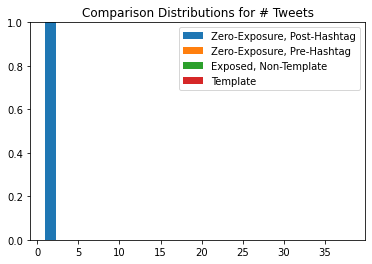

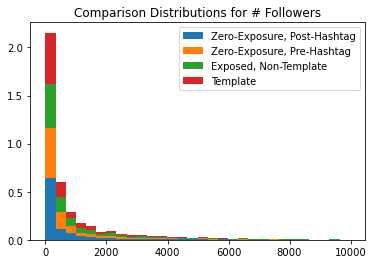

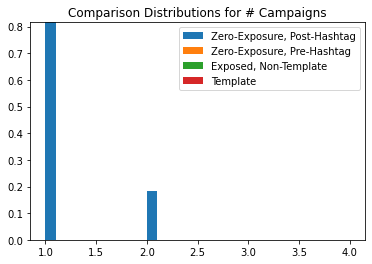

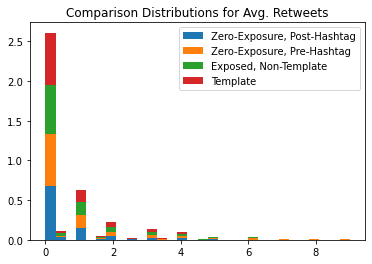

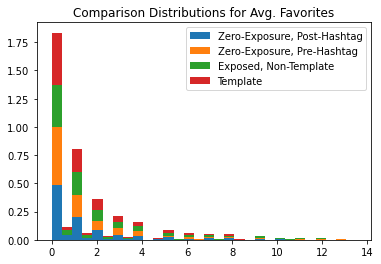

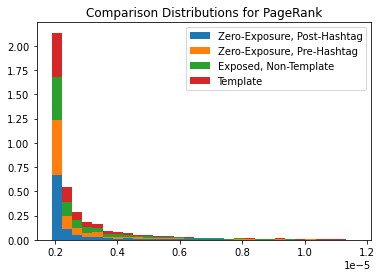

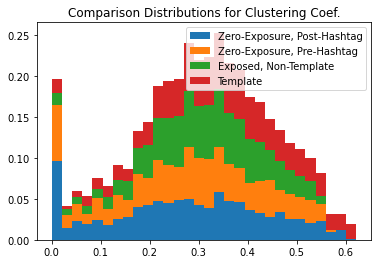

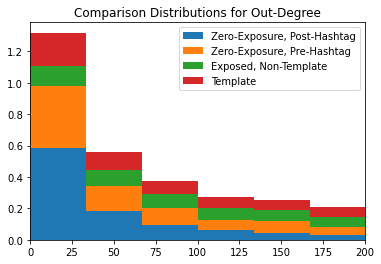

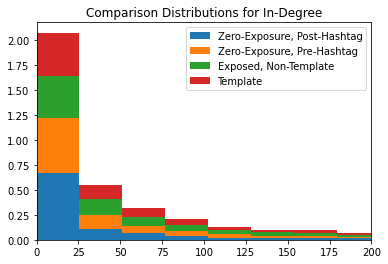

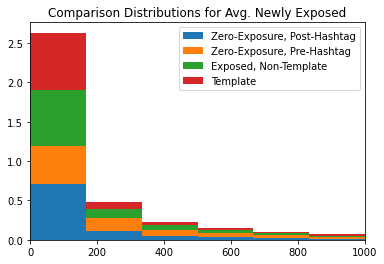

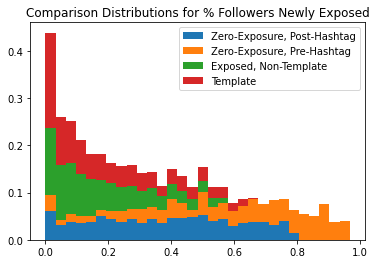

In [132]:
for c in columns_to_display:
    quantile = .9
    things = []
    for t in types:
        temper = temp[temp['Group'] == t][c]
#         print('type: ', t, len(temper))
        things.append(temper[temper < temper.quantile(quantile)])
    
    logx = False
    bins = 20
    if logx:
        hist, bins = np.histogram(temp[c].fillna(0), bins=bins)
        logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
        plt.hist(things, bins=logbins, label=types, stacked=True)
        plt.xscale('log')
    else:
        normalize_hist_before_stack(things, label=types)
        # plt.hist(things, label=types, stacked=True, density=False, bins=20, log=False)
    if c in xlimit_settings:
        plt.xlim(xlimit_settings[c])
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

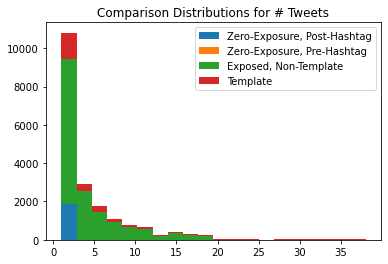

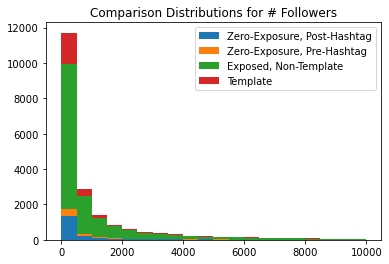

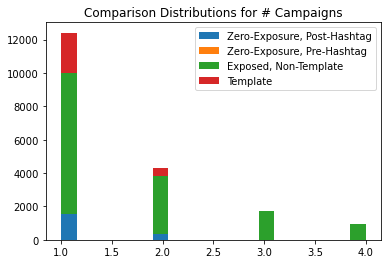

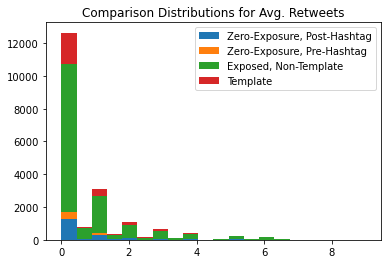

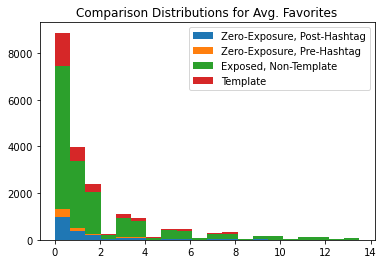

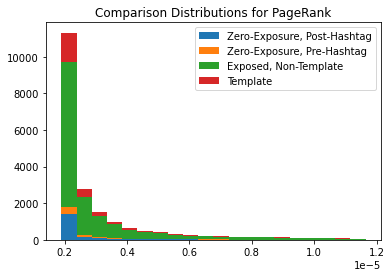

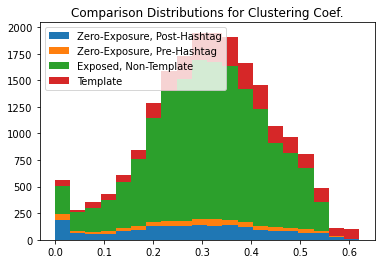

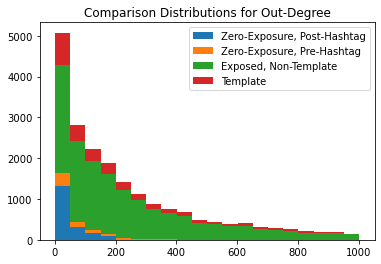

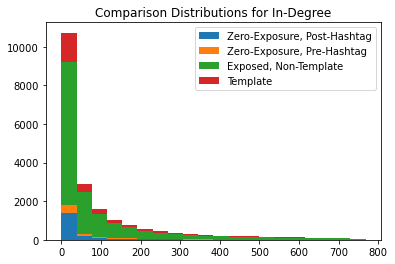

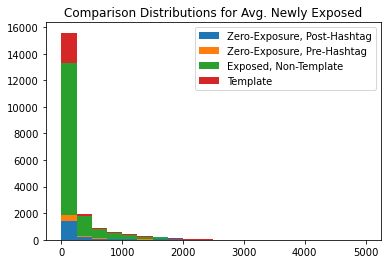

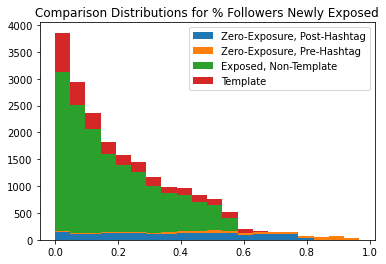

In [60]:
for c in columns_to_display:
    quantile = .9
    things = []
    for t in types:
        temper = temp[temp['Group'] == t][c]
        things.append(temper[temper < temper.quantile(quantile)])
    
    logx = False
    bins = 20
    if logx:
        hist, bins = np.histogram(temp[c].fillna(0), bins=bins)
        logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
        plt.hist(things, bins=logbins, label=types, stacked=True)
        plt.xscale('log')
    else:
        plt.hist(things, label=types, stacked=True, density=False, bins=20, log=False)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

Automating these plots isn't really working so I'll just do them by hand

In [67]:
np.geomspace(0.001,1,20)

array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])

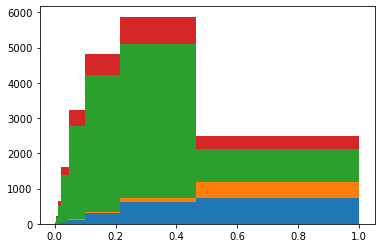

In [69]:
c = '% Followers Newly Exposed'
quantile = .9
things = []
for t in types:
    temper = temp[temp['Group'] == t][c]
    things.append(temper[temper < temper.quantile(quantile)])
    
_  = plt.hist(things, label=types, stacked=True, density=False, bins=np.geomspace(0.001,1,10), log=False)

    

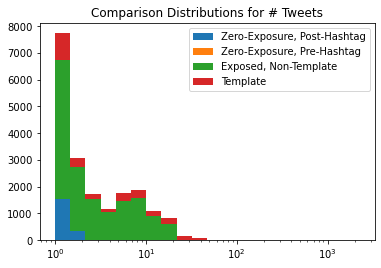

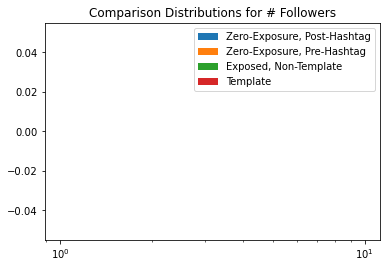

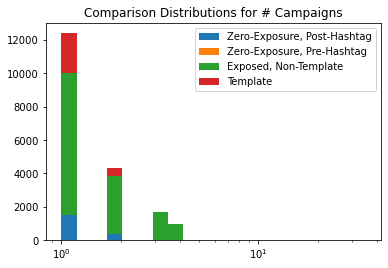

No handles with labels found to put in legend.


Avg. Retweets


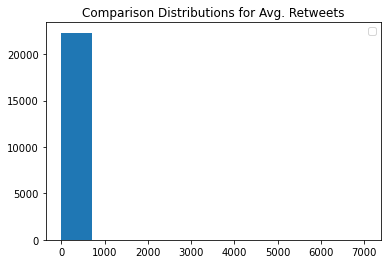

No handles with labels found to put in legend.


Avg. Favorites


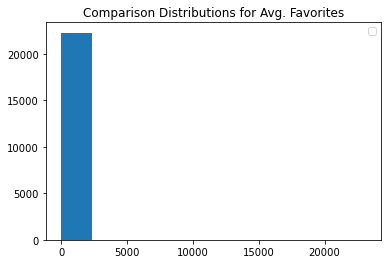

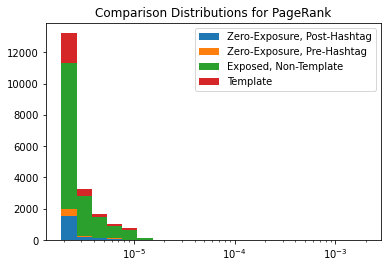

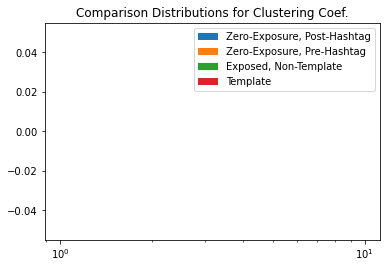

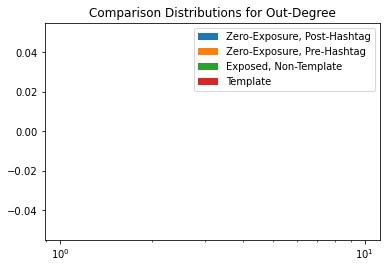

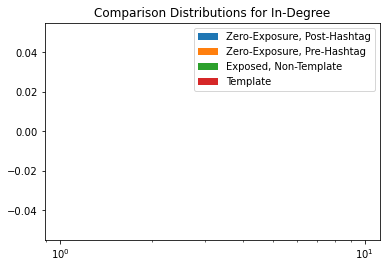

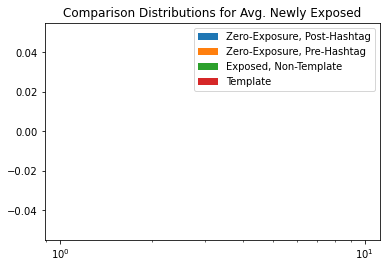

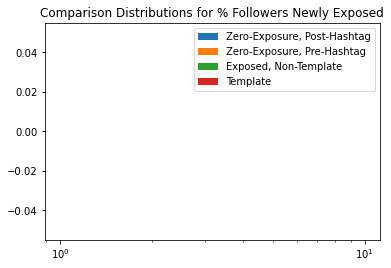

In [52]:
for c in columns_to_display:
    quantile = .9
    things = []
    for t in types:
        temper = temp[temp['Group'] == t][c]
        things.append(temper[temper < temper.quantile(quantile)])
    
    logx = True
    bins = 20
    if logx:
        try:
            hist, bins = np.histogram(temp[c], bins=bins)
            logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
            plt.hist(things, bins=logbins, label=types, stacked=True)
            plt.xscale('log')
        except:
            plt.hist(temp[c])
            print(c)
    else:
        plt.hist(things, label=types, stacked=True, density=False, bins=20, log=False)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

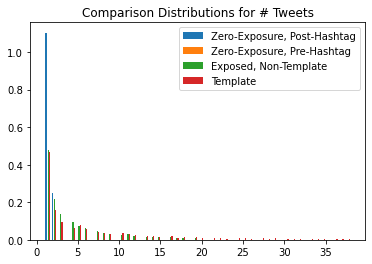

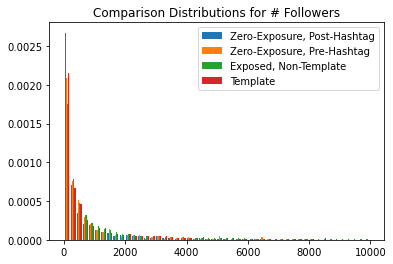

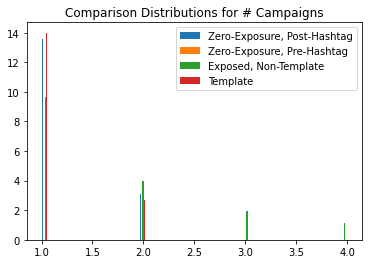

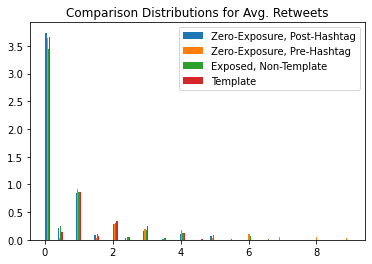

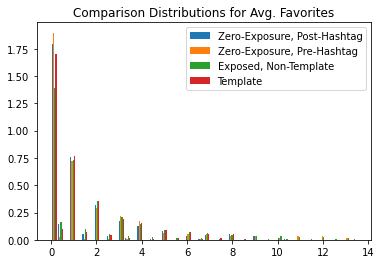

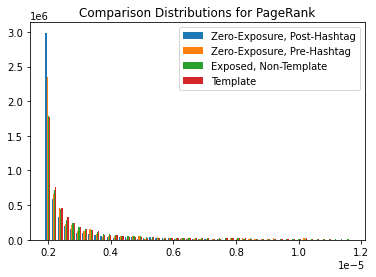

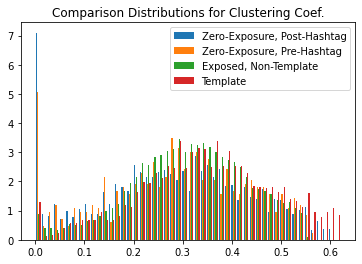

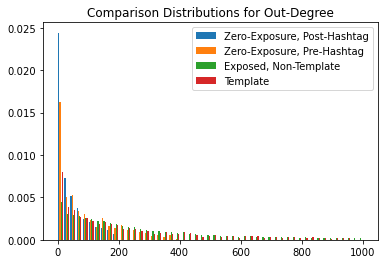

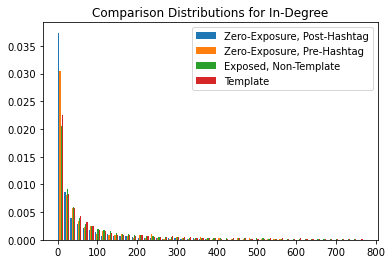

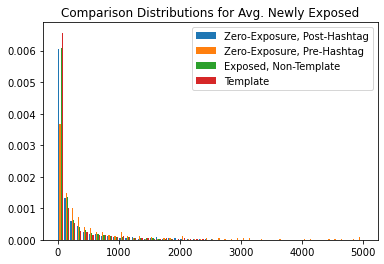

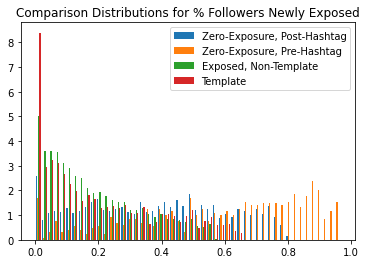

In [47]:
for c in columns_to_display:
    quantile = .9
    things = []
    for t in types:
        temper = temp[temp['Group'] == t][c]
        things.append(temper[temper < temper.quantile(quantile)])
        
    plt.hist(things, label=types, stacked=False, density=True, bins=50, log=False)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

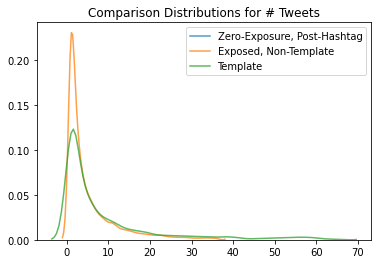

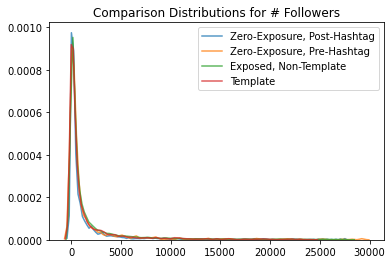

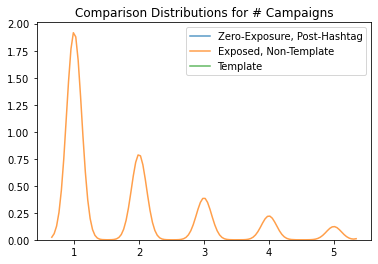

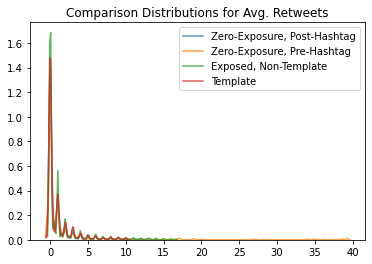

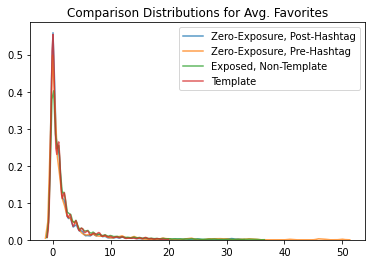

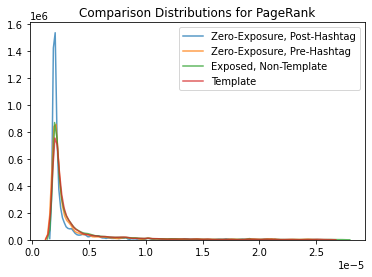

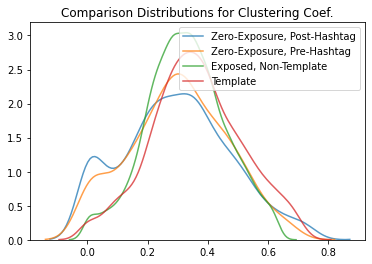

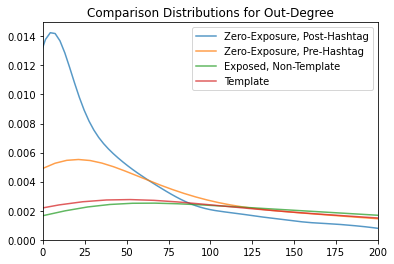

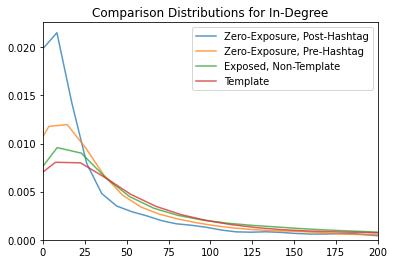

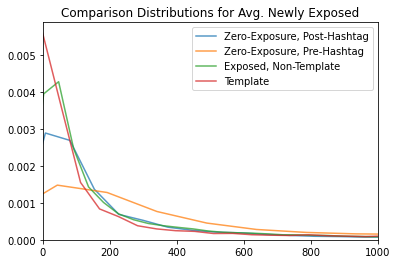

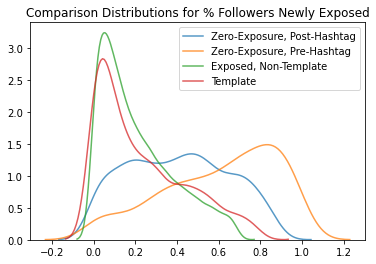

In [78]:
for c in columns_to_display:
    quantile = .95
    for t in types:
        temper = temp[temp['Group'] == t][c]
        sns.kdeplot(temper[temper < temper.quantile(quantile)], label=t,
                   alpha=.75)

    if c in xlimit_settings:
        plt.xlim(xlimit_settings[c])
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

# Examining The Disjoint

In [15]:
zero_exposure_tweeters.query('outdeg == 0')

username                   id retweet_from  \
adj_date                                                                 
2019-02-17 14:33:29     bjp4ichagarh  1097058944114089985                
2019-09-12 14:57:24  rajeevsondhibjp  1172079249953443840                
2019-02-17 14:21:04     bjp4ichagarh  1097055819063906304                
2019-09-12 14:54:25  rajeevsondhibjp  1172078502453006343                
2019-09-12 14:58:39  rajeevsondhibjp  1172079566766006272                
...                              ...                  ...          ...   
2018-10-12 00:53:50  offersanddeals4  1050467027213676545                
2018-10-12 13:16:34      aparichit70  1050653943078875136                
2018-10-27 16:18:53      aparichit70  1056135642038657024                
2018-10-12 13:25:23      aparichit70  1050656160678694913                
2018-10-17 18:44:43      aparichit70  1052548460736651264                

                    template retweet_id  \
adj_date                                  
2019-02-17 14:33:29                       
2019-09-12 14:57:24                       
2019-02-17 14:21:04                       
2019-09-12 14:54:25                       
2019-09-12 14:58:39                       
...                      ...        ...   
2018-10-12 00:53:50                       
2018-10-12 13:16:34                       
2018-10-27 16:18:53                       
2018-10-12 13:25:23                       
2018-10-17 18:44:43                       

                                                                  text  \
adj_date                                                                 
2019-02-17 14:33:29  ‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§° ‡§ï‡•ã ‡§™‡•ç‡§∞‡§ß‡§æ‡§®‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§ú‡•Ä ‡§ï‡•Ä ‡§è‡§ï ‡§î‡§∞ ‡§∏‡•å‡§ó‡§æ‡§§ #jhar...   
2019-09-12 14:57:24  ‡§Ü‡§ú ‡§Ü‡§¶‡§ø‡§µ‡§æ‡§∏‡•Ä ‡§¨‡§ö‡•ç‡§ö‡•ã‡§Ç ‡§ï‡•Ä, ‡§Ø‡•Å‡§µ‡§æ‡§ì‡§Ç ‡§ï‡•Ä ‡§∂‡§ø‡§ï‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§â‡§®‡§ï‡•á...   
2019-02-17 14:21:04  #jharkhand ‡§Æ‡•á‡§Ç 2014 ‡§§‡§ï ‡§∏‡§ø‡§∞‡•ç‡§´ 16 mw ‡§∏‡•å‡§∞ ‡§ä‡§ú‡§æ ‡§ï‡§æ ...   
2019-09-12 14:54:25  ‡§π‡§Æ‡§®‡•á ‡§™‡•ç‡§∞‡§ß‡§æ‡§®‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§Ü‡§µ‡§æ‡§∏ ‡§Ø‡•ã‡§ú‡§®‡§æ ‡§ï‡•á ‡§Æ‡§æ‡§ß‡•ç‡§Ø‡§Æ ‡§∏‡•á 2 ‡§ï‡§∞...   
2019-09-12 14:58:39  ‡§Ø‡•á ‡§è‡§ï‡§≤‡§µ‡•ç‡§Ø ‡§∏‡•ç‡§ï‡•Ç‡§≤ ‡§Ü‡§¶‡§ø‡§µ‡§æ‡§∏‡•Ä ‡§¨‡§ö‡•ç‡§ö‡•ã‡§Ç ‡§ï‡•Ä ‡§™‡§¢‡§º‡§æ‡§à-‡§≤‡§ø‡§ñ‡§æ‡§à ...   
...                                                                ...   
2018-10-12 00:53:50  üí•üí•üòçskmei analog digital watches @ 91% off star...   
2018-10-12 13:16:34  accept karo challange #gappupappu https://t.co...   
2018-10-27 16:18:53  #gappupappu ki team se @rahulgandhi ji https:/...   
2018-10-12 13:25:23      #gappupappu sudar jao https://t.co/277yypud7q   
2018-10-17 18:44:43                #gappupappu https://t.co/q9h58e3smq   

                                   date retweets favorites  \
adj_date                                                     
2019-02-17 14:33:29 2019-02-17 09:03:29        1         1   
2019-09-12 14:57:24 2019-09-12 09:27:24        0         1   
2019-02-17 14:21:04 2019-02-17 08:51:04        1         1   
2019-09-12 14:54:25 2019-09-12 09:24:25        0         4   
2019-09-12 14:58:39 2019-09-12 09:28:39        0         1   
...                                 ...      ...       ...   
2018-10-12 00:53:50 2018-10-11 19:23:50        0         0   
2018-10-12 13:16:34 2018-10-12 07:46:34        0         0   
2018-10-27 16:18:53 2018-10-27 10:48:53        0         0   
2018-10-12 13:25:23 2018-10-12 07:55:23        0         0   
2018-10-17 18:44:43 2018-10-17 13:14:43        0         0   

                               adj_date  ... normal_exposure total_exposure  \
adj_date                                 ...                                  
2019-02-17 14:33:29 2019-02-17 14:33:29  ...               0              0   
2019-09-12 14:57:24 2019-09-12 14:57:24  ...               0              0   
2019-02-17 14:21:04 2019-02-17 14:21:04  ...               0              0   
2019-

In [16]:
zero_exposure_tweeters.query('indeg == 0')

username                   id retweet_from  \
adj_date                                                                 
2019-09-25 22:58:46     trueself1950  1176911432983531520                
2019-09-19 11:11:05     trueself1950  1174559012139831296                
2019-09-18 19:26:31     trueself1950  1174321304826044416                
2019-09-12 11:59:11     trueself1950  1172034400550150146                
2019-09-16 12:28:00     trueself1950  1173491207055368194                
...                              ...                  ...          ...   
2019-03-09 20:00:03        gumnamhai  1104388883599499264                
2019-01-04 21:14:26  gargmanishindia  1081214780487159808                
2019-01-02 23:14:20  gargmanishindia  1080520180462223360                
2019-01-02 23:41:25  gargmanishindia  1080526994855682048                
2019-01-02 22:56:25  gargmanishindia  1080515671291772930                

                    template retweet_id  \
adj_date                                  
2019-09-25 22:58:46                       
2019-09-19 11:11:05                       
2019-09-18 19:26:31                       
2019-09-12 11:59:11                       
2019-09-16 12:28:00                       
...                      ...        ...   
2019-03-09 20:00:03                       
2019-01-04 21:14:26                       
2019-01-02 23:14:20                       
2019-01-02 23:41:25                       
2019-01-02 22:56:25                       

                                                                  text  \
adj_date                                                                 
2019-09-25 22:58:46  #bjp #haryanaassemblyelection #haryanaelection...   
2019-09-19 11:11:05  #modimadedisaster #modified100 #varanasi #utta...   
2019-09-18 19:26:31  #save2lakhjobs #syeraatrailer #ecigarettes #ec...   
2019-09-12 11:59:11  #haryana #jharkhand #jharkhandwithmodi #mahara...   
2019-09-16 12:28:00  #haryanaelection #haryana #maharashtra #mahara...   
...                                                                ...   
2019-03-09 20:00:03  ‡§ú‡§¨ ‡§∏‡•à‡§´‡§º ‡§Ö‡§≤‡•Ä ‡§ñ‡§æ‡§® ‡§ï‡§æ ‡§¨‡•á‡§ü‡§æ ‡§§‡•à‡§Æ‡•Ç‡§∞ ‡§Ö‡§≤‡•Ä ‡§ñ‡§æ‡§® ‡§π‡•à ‡§§‡•ã ‡§´‡§º...   
2019-01-04 21:14:26  #rafaledramaflops #gappupappu made a big mocke...   
2019-01-02 23:14:20  dear #rahulgandhi #gappupappu #mahagathbandhan...   
2019-01-02 23:41:25  dear mam @smitaprakash, why are #secularmedia ...   
2019-01-02 22:56:25  @sudhirbharg #gappupappu #liemachine #rahulgan...   

                                   date retweets favorites  \
adj_date                                                     
2019-09-25 22:58:46 2019-09-25 17:28:46        1         0   
2019-09-19 11:11:05 2019-09-19 05:41:05        0         1   
2019-09-18 19:26:31 2019-09-18 13:56:31        2         0   
2019-09-12 11:59:11 2019-09-12 06:29:11        1         0   
2019-09-16 12:28:00 2019-09-16 06:58:00        0         0   
...                                 ...      ...       ...   
2019-03-09 20:00:03 2019-03-09 14:30:03       27        31   
2019-01-04 21:14:26 2019-01-04 15:44:26        0         0   
2019-01-02 23:14:20 2019-01-02 17:44:20        1         0   
2019-01-02 23:41:25 2019-01-02 18:11:25        0         0   
2019-01-02 22:56:25 2019-01-02 17:26:25        0         1   

                               adj_date  ... normal_exposure total_exposure  \
adj_date                                 ...                                  
2019-09-25 22:58:46 2019-09-25 22:58:46  ...               0              0   
2019-09-19 11:11:05 2019-09-19 11:11:05  ...               0              0   
2019-09-18 19:26:31 2019-09-18 19:26:31  ...               0              0   
2019-09-12 11:59:11 2019-09-12 11:59:11  ...               0              0   
2019-09-16 12:28:00 2019-09-16 12:28:00  ...               0              0   
...                                 ...  ...             ...            ...   
2019-03-09 20:00:03 2019-03-09 20

In [24]:
zero_exposure_tweeters.query('outdeg == 0 and indeg == 0')

username                                                        vishalcincmp
id                                                       1195479544301412352
retweet_from                                                                
template                                                                    
retweet_id                                                                  
text                       üò°waiting for my first subscriberüò° -&gt;https:/...
date                                                     2019-11-15 23:11:48
retweets                                                                 126
favorites                                                                786
adj_date                                                 2019-11-16 04:41:48
type                                                                 regular
follower_data                                                           True
template_exposure                                                     

In [34]:
zero_exposure_tweeters.query('outdeg == 0 and indeg == 0').join(user_df, on='username', rsuffix='_userdf').sort_values('followers')

username                   id retweet_from template  \
adj_date                                                                        
2019-05-10 19:16:15        rabta25  1126845912460840960                         
2019-07-12 12:02:57        rabta25  1149567300502081537                         
2019-06-20 19:37:56        rabta25  1141709270473330690                         
2019-05-03 21:33:34        rabta25  1124343752892358656                         
2019-05-02 18:33:10        rabta25  1123935964655702020                         
...                            ...                  ...          ...      ...   
2019-03-09 19:19:40  astradiscover  1104378720956137472                         
2019-03-09 19:21:00  astradiscover  1104379058492706816                         
2019-03-09 20:25:46  astradiscover  1104395355846836227                         
2019-03-09 20:16:48  astradiscover  1104393100909268992                         
2019-03-09 19:38:32  astradiscover  1104383472460812288                         

                    retweet_id  \
adj_date                         
2019-05-10 19:16:15              
2019-07-12 12:02:57              
2019-06-20 19:37:56              
2019-05-03 21:33:34              
2019-05-02 18:33:10              
...                        ...   
2019-03-09 19:19:40              
2019-03-09 19:21:00              
2019-03-09 20:25:46              
2019-03-09 20:16:48              
2019-03-09 19:38:32              

                                                                  text  \
adj_date                                                                 
2019-05-10 19:16:15  @satyasanatanind @opindia_com @aktkadmin @zee5...   
2019-07-12 12:02:57  @rohini_sgh @boogiepest @one_by_two @theprinti...   
2019-06-20 19:37:56  @aktkadmin @zee5telugu @bjpsamvad @bjp4india @...   
2019-05-03 21:33:34  @tv1telugu @bengalurufc @blrcitypolice @incind...   
2019-05-02 18:33:10  @incindia @jaitdp @satyasanatanind @opindia_co...   
...                                                                ...   
2019-03-09 19:19:40  üòÄwaiting for my first subscriberüòÄ -&gt;https:/...   
2019-03-09 19:21:00  üòÄwaiting for my first subscriberüòÄ -&gt;https:/...   
2019-03-09 20:25:46  üòÄwaiting for my first subscriberüòÄ -&gt;https:/...   
2019-03-09 20:16:48  üòÄwaiting for my first subscriber -&gt;https://...   
2019-03-09 19:38:32  üòÄwaiting for my first subscriberüòÄ -&gt;https:/...   

                                   date retweets favorites  \
adj_date                                                     
2019-05-10 19:16:15 2019-05-10 13:46:15        0         0   
2019-07-12 12:02:57 2019-07-12 06:32:57        0         0   
2019-06-20 19:37:56 2019-06-20 14:07:56        0         0   
2019-05-03 21:33:34 2019-05-03 16:03:34        0         0   
2019-05-02 18:33:10 2019-05-02 13:03:10        0         0   
...                                 ...      ...       ...   
2019-03-09 19:19:40 2019-03-09 13:49:40        1         1   
2019-03-09 19:21:00 2019-03-09 13:51:00        1         1   
2019-03-09 20:25:46 2019-03-09 14:55:46        1         1   
2019-03-09 20:16:48 2019-03-09 14:46:48        1         1   
2019-03-09 19:38:32 2019-03-09 14:08:32        0         1   

                               adj_date  ...           id_userdf location  \
adj_date                                 ...                                
2019-05-10 19:16:15 2019-05-10 19:16:15  ...  893853582134358016            
2019-07-12 12:02:57 2019-07-12 12:02:57  ...  893853582134358016            
2019-06-20 19:37:56 2019-06-20 19:37:56  ...  893853582134358016            
2019-05-03 21:33:34 2019-05-03 21:33:34  ...  893853582134358016            
2019-05-02 18:33:10 2019-05-02 18:33:10  ...  893853582134358016            
...                                 ...  ...                 ...      ...   
2019-03-09 19:19:40 2019-03-09 19:19:40  ...                 NaN      NaN   
2019-03-09 19:21:00 2019-03-09 19:21:00

In [15]:
def annotate(df):
    df['hashtags_used'] = df.text.apply(lambda x: x.count('#'))
    df['users_tagged'] = df.text.apply(lambda x: x.count('@'))
    df['includes_link'] = df.text.apply(lambda x: 'http' in x)
    return df

In [17]:
def print_tweets(df):
    for time, row in df.iterrows():
        if label_tweet(row.text):
            print('--', row.username)
        #print(f'{row.text}\n--{row.username}, {row.followers} followers, {row.friends} friends\n')

In [18]:
len(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0'))

83

In [19]:
print_tweets(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0'))

make this video most disliked video please --&gt;https://t.co/nzsdetcsda&lt;-- #pulwamaterrorattacks #successofmakeinindia #exposedeshdrohis #timeforrevenge geelani yasin malik abdul ghani bhat mirwaiz umar farooq #jharkhandwithmodi ck khanna
#the best pm of india in last 70 years! real statesman, visionary leader, real karm yogi, india is lucky to have such a great pm, we have not seen any pm earlier with the energy to work like @narendramodi ji üëèüôè #merapmmeraabhimaan #modi #narendramodi #chhattisgarhelections https://t.co/yesnwputri
‡∞®‡±á‡∞°‡±á '‡∞ï‡∞ø‡∞Ø‡∞æ' ‡∞§‡±ä‡∞≤‡∞ø ‡∞ï‡∞æ‡∞∞‡±Å ‡∞Ü‡∞µ‡∞ø‡∞∑‡±ç‡∞ï‡∞∞‡∞£!!!!! ‡∞Ö‡∞®‡∞Ç‡∞§‡∞™‡±Å‡∞∞‡∞Ç ‡∞™‡±ç‡∞∞‡∞Ø‡±ã‡∞ó‡∞∂‡∞æ‡∞≤‡∞≤‡±ã ‡∞∂‡±ç‡∞∞‡±Ä‡∞ï‡∞æ‡∞∞‡∞Ç ‡∞®‡±á‡∞°‡±á ‡∞∞‡±ã‡∞°‡±ç‡∞°‡±Ü‡∞ï‡±ç‡∞ï‡∞®‡±Å‡∞®‡±ç‡∞® ‡∞ï‡∞ø‡∞Ø‡∞æ ‡∞ï‡∞æ‡∞∞‡±Å... #kiamadeinap #kiafirstcarinap #kiainandhra #kiainindia #kia https://t.co/prfivgqsnf
@satyasanatanind @opindia_com @aktkadmin @zee5telugu @bjpsamvad @bjp4india @ipl #ipl2019 #bengalurusouth #bengali #w

In [162]:
len(temp.username.unique())

51

In [157]:
len(temp)

83

In [171]:
temp.hashtags_used.mean()

4.674698795180723

In [170]:
temp.includes_link.mean()

0.6506024096385542

In [169]:
user_df.loc['ajay2u21']

templates                            0
template_retweets                    0
tweets                               6
retweets                             0
campaigns                            0
id                           405401807
location                 mumbai, india
description                        üôèüòòüôè
followers                           24
friends                             98
statuses                          2384
type                 6_non-participant
new_description                   None
temp                   non-participant
group                                0
Name: ajay2u21, dtype: object

In [20]:
from config import CASCADE_DIR

In [22]:
import graph_tool.all as gt
gt.load_graph(os.path.join(CASCADE_DIR, '1123982001294516225_temporal.gt'))

<Graph object, directed, with 4 vertices and 3 edges, 1 internal vertex property, at 0x2aaaf9eda910>

In [175]:
temp.loc[32254]

username                                                            ajay2u21
id                                                       1123982001294516225
retweet_from                                                                
template                                                                    
retweet_id                                                                  
text                       grand welcome üòçüôèüòç ‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞‡•Ä ‡§™‡§Ç‡§°‡§ø‡§§‡•ã‡§Ç ‡§ï‡§æ ‡§ò‡§∞ ‡§µ‡§æ‡§™‡§∏‡•Ä ...
date                                                     2019-05-02 16:06:06
retweets                                                                 126
favorites                                                                786
adj_date                                                 2019-05-02 21:36:06
type                                                                 regular
follower_data                                                           True
template_exposure    

In [168]:
temp.sort_values('retweets')

username                   id retweet_from template retweet_id  \
43558  revatiramanpan7  1116572490766045189                                    
1354   stockma80935639  1082527271099875328                                    
1228   meravotemeriaw1  1082521248016592902                                    
2718        sksourav10  1062977781737369600                                    
2171         movies_it  1062979425761865728                                    
...                ...                  ...          ...      ...        ...   
12293       navraj_dey  1111884783448215552                                    
693         sachi_mahe  1073842785860513792                                    
840      astradiscover  1093157068675186688                                    
14082       sgoswami41  1070227184642478080                                    
32254         ajay2u21  1123982001294516225                                    

                                                    text                date  \
43558  ‡§ò‡§∞ ‡§Æ‡•á‡§Ç ‡§¨‡•à‡§†‡§ï‡§∞ ‡§ó‡§æ‡§≤‡§ø‡§Ø‡§æ‡§Å ‡§¶‡•á‡§®‡•á ‡§∏‡•á ‡§Ü‡§§‡§Ç‡§ï‡§µ‡§æ‡§¶‡•Ä ‡§®‡§π‡•Ä‡§Ç ‡§Æ‡§∞‡§æ... 2019-04-12 05:23:21   
1354   vakrangee ‡§Æ‡•á‡§Ç ‡§Ö‡§¨ ‡§ï‡•ç‡§Ø‡§æ ‡§ï‡§ø‡§Ø‡§æ ‡§ú‡§æ‡§Ø‡•á ? ‡§ï‡§≠‡•Ä upper ci... 2019-01-08 06:39:48   
1228   #cbivscbi #bharatbandh #alokverma #university ... 2019-01-08 06:15:52   
2718   #ahsapocalypse #cmaawards #ÿßŸÑÿÆŸÖŸäÿ≥ #eltonjohnle... 2018-11-15 07:57:06   
2171   sonakshi sinha!! . . . #deepikaranveer #sonaks... 2018-11-15 08:03:38   
...                                                  ...                 ...   
12293  99%of what modi utters seems fake &amp; lies..... 2019-03-30 06:56:04   
693    congress ka maalik moron hai? #justasking üëâ rt... 2018-12-15 07:30:45   
840    https://t.co/jrnmujiimf #pubglive #pubgmobile ... 2019-02-06 14:38:49   
14082  though i am not a citizen of #rajasthan, had i... 2018-12-05 08:03:39   
32254  grand welcome üòçüôèüòç ‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞‡•Ä ‡§™‡§Ç‡§°‡§ø‡§§‡•ã‡§Ç ‡§ï‡§æ ‡§ò‡§∞ ‡§µ‡§æ‡§™‡§∏‡•Ä ... 2019-05-02 16:06:06   

      retweets favorites            adj_date  ... inferred_trending_start  \
43558        0         0 2019-04-12 10:53:21  ...     2019-01-22 08:30:00   
1354         0         1 2019-01-08 12:09:48  ...     2019-01-08 08:30:00   
1228         0         1 2019-01-08 11:45:52  ...     2019-01-08 08:30:00   
2718         0         1 2018-11-15 13:27:06  ...     2018-11-15 09:30:00   
2171         0         0 2018-11-15 13:33:38  ...     2018-11-15 09:30:00   
...        ...       ...                 ...  ...                     ...   
12293        2         3 2019-03-30 12:26:04  ...     2019-03-30 08:30:00   
693          2         0 2018-12-15 13:00:45  ...     2018-12-15 10:30:00   
840          2         3 2019-02-06 20:08:49  ...     2019-02-06 19:30:00   
14082        3         8 2018-12-05 13:33:39  ...     2018-12-05 10:30:00   
32254      126       786 2019-05-02 21:36:06  ...     2019-03-19 08:30:00   

                          hashtag newly_exposed_users      pr cc outdeg indeg  \
43558    ‡§≤‡§ï‡•ç‡§∑‡•ç‡§Ø_‡§π‡§Æ‡§æ‡§∞‡§æ_‡§Æ‡•ã‡§¶‡•Ä_‡§¶‡•ã‡§¨‡§æ‡§∞‡§æ                   0 1.9e-06  0      0     0   
1354   congresseurofighterscandal                   3 1.9e-06  0      0     0   
1228   congresseurofighterscandal                  13 1.9e-06  0      0     0   
2718             ragafailonrafale                  96 1.9e-06  0      0     0   
2171             ragafailonrafale                   0 1.9e-06  0      0     0   
...                           ...                 ...     ... ..    ...   ...   
12293        maikamalkhilaneayahu                   1 1.9e-06  0      0     0   
693                  rafailgandhi                  11 1.9e-06  0      0     0   
840                     sizeindia                   7 1.9e-06  0      0     0   
14082         ‡§Æ‡•ç‡§π‡§æ‡§∞‡§æ_‡§µ‡•ã‡§ü_‡§≠‡§æ‡§ú‡§™‡§æ_‡§ï‡•ã                   3 1.9e-06  0      0     0   
32254              mod

In [23]:
temp = annotate(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0'))


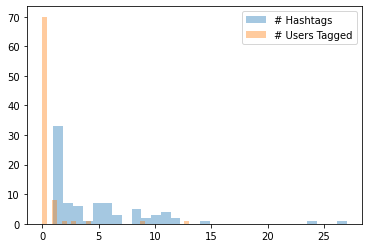

In [28]:
plt.hist(temp.hashtags_used, bins=30, alpha=.4, label='# Hashtags')#, density=True)
plt.hist(temp.users_tagged, bins=30, alpha=.4, label='# Users Tagged')#, density=True)

plt.legend()

In [21]:
temp

username                   id retweet_from template retweet_id  \
10202    astradiscover  1097122057329000448                                    
12553  nobeatinground1  1061579553435398144                                    
12554  nobeatinground1  1061581524653420544                                    
12555  nobeatinground1  1061583862730387459                                    
12556  nobeatinground1  1061584354852274178                                    
...                ...                  ...          ...      ...        ...   
1652       babypusarla  1104437442160013314                                    
1653       babypusarla  1104432422278508544                                    
1654       babypusarla  1104432605724729345                                    
1655       babypusarla  1104440461836447745                                    
2453       usmannghani  1104344172281118720                                    

                                                    text                date  \
10202  make this video most disliked video please --&... 2019-02-17 13:14:16   
12553  #merapmmeraabhimaan "india can‚Äôt work from the... 2018-11-11 11:21:03   
12554  #merapmmeraabhimaan for the first time we have... 2018-11-11 11:28:53   
12555  #merapmmeraabhimaan "imaandar kamdaar chowkida... 2018-11-11 11:38:10   
12556  #merapmmeraabhimaan they abused mr modi from 2... 2018-11-11 11:40:08   
...                                                  ...                 ...   
1652   #modifiedjobs #83worldcupontkss #cbnarmy #apwi... 2019-03-09 17:43:00   
1653   #modifiedjobs #83worldcupontkss #cbnarmy #apwi... 2019-03-09 17:23:03   
1654   #modifiedjobs #83worldcupontkss #cbnarmy #apwi... 2019-03-09 17:23:47   
1655   #modifiedjobs #83worldcupontkss #cbnarmy #apwi... 2019-03-09 17:55:00   
2453   india did surgical strike on urdu gate this is... 2019-03-09 11:32:23   

      retweets favorites            adj_date  ... inferred_trending_start  \
10202        1         1 2019-02-17 18:44:16  ...     2019-02-17 14:20:00   
12553        0         1 2018-11-11 16:51:03  ...     2018-11-11 11:05:00   
12554        0         0 2018-11-11 16:58:53  ...     2018-11-11 11:05:00   
12555        0         1 2018-11-11 17:08:10  ...     2018-11-11 11:05:00   
12556        0         2 2018-11-11 17:10:08  ...     2018-11-11 11:05:00   
...        ...       ...                 ...  ...                     ...   
1652         0         0 2019-03-09 23:13:00  ...     2019-03-09 15:30:00   
1653         0         1 2019-03-09 22:53:03  ...     2019-03-09 15:30:00   
1654         0         0 2019-03-09 22:53:47  ...     2019-03-09 15:30:00   
1655         0         0 2019-03-09 23:25:00  ...     2019-03-09 15:30:00   
2453         0         0 2019-03-09 17:02:23  ...     2019-03-09 15:30:00   

                  hashtag newly_exposed_users        pr   cc outdeg indeg  \
10202   jharkhandwithmodi                 5.0  0.000002  0.0    0.0   0.0   
12553  merapmmeraabhimaan                 2.0  0.000002  0.0    0.0   0.0   
12554  merapmmeraabhimaan                 2.0  0.000002  0.0    0.0   0.0   
12555  merapmmeraabhimaan                 2.0  0.000002  0.0    0.0   0.0   
12556  merapmmeraabhimaan                 2.0  0.000002  0.0    0.0   0.0   
...                   ...                 ...       ...  ...    ...   ...   
1652         modifiedjobs                11.0  0.000002  0.0    0.0   0.0   
1653         modifiedjobs                11.0  0.000002  0.0    0.0   0.0   
1654         modifiedjobs                11.0  0.000002  0.0    0.0   0.0   
1655         modifiedjobs                11.0  0.000002  0.0    0.0   0.0   
2453         modifiedjobs                45.0  0.000002  0.0    0.0   0.0   

      hashtags_used users_tagged  includes_link  
10202             5            0           True  
12553             1            0          False  
12554             1            0          False  
12555             1            0        

In [15]:
print_tweets(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0'))
             #.join(user_df, on='username', rsuffix='_userdf').sort_values('followers', ascending=False))

link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
hashtag abuser
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
hashtag abuser
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
hashtag abuser
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
link
hashtag abuser
link
link
link
link
link
link
master tagger
link
link
link
link
l

In [36]:
print_tweets(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0').\
             join(user_df, on='username', rsuffix='_userdf').sort_values('followers', ascending=False))

https://t.co/bugpyahjqp #5aralƒ±kd√ºnyakadƒ±nhaklarƒ±g√ºn√º #masterchefbr #felizmi√©rcoles #wednesdaywisdom #goknightsgo #theflash #maari2trailer #uritrailer #urisurgicalstrike #‡§Æ‡•ç‡§π‡§æ‡§∞‡§æ_‡§µ‡•ã‡§ü_‡§≠‡§æ‡§ú‡§™‡§æ_‡§ï‡•ã #gsat11
--lamb_ruthann, 208 followers, 1399 friends

very simple data entry job full bangla tutorial 2018 || data entry=========== https://t.co/uau73sugxu #5aralƒ±kd√ºnyakadƒ±nhaklarƒ±g√ºn√º #masterchefbr #felizmi√©rcoles #wednesdaywisdom #goknightsgo #theflash #maari2trailer #uritrailer #urisurgicalstrike #‡§Æ‡•ç‡§π‡§æ‡§∞‡§æ_‡§µ‡•ã‡§ü_‡§≠‡§æ‡§ú‡§™‡§æ_‡§ï‡•ã #gsat11
--lamb_ruthann, 208 followers, 1399 friends

https://t.co/eptu6f7sim #5aralƒ±kd√ºnyakadƒ±nhaklarƒ±g√ºn√º #masterchefbr #felizmi√©rcoles #wednesdaywisdom #goknightsgo #theflash #maari2trailer #uritrailer #urisurgicalstrike #‡§Æ‡•ç‡§π‡§æ‡§∞‡§æ_‡§µ‡•ã‡§ü_‡§≠‡§æ‡§ú‡§™‡§æ_‡§ï‡•ã #gsat11
--lamb_ruthann, 208 followers, 1399 friends

#5aralƒ±kd√ºnyakadƒ±nhaklarƒ±g√ºn√º #masterchefbr #felizmi√©rcoles #wedne

In [28]:
print_tweets(zero_exposure_tweeters.query('outdeg == 0 and indeg == 0'))

make this video most disliked video please --&gt;https://t.co/nzsdetcsda&lt;-- #pulwamaterrorattacks #successofmakeinindia #exposedeshdrohis #timeforrevenge geelani yasin malik abdul ghani bhat mirwaiz umar farooq #jharkhandwithmodi ck khanna
--astradiscover

#merapmmeraabhimaan "india can‚Äôt work from the centre, says raghuram rajan" "india works from every home, frm every kitchen, frm every field, frm every shed, frm every factory, frm every office, frm every school, frm every hospital, and we are all inspired by our pm."
--nobeatinground1

‡§∂‡§∞‡§¶ ‡§Ø‡§æ‡§¶‡§µ ‡§®‡•á ‡§ï‡§≤ ‡§¨‡•ã‡§´‡§º‡•ã‡§∞‡•ç‡§∏ ‡§ó‡§º‡§≤‡§§‡•Ä ‡§∏‡•á ‡§®‡§π‡•Ä‡§Ç ‡§¨‡§≤‡•ç‡§ï‡§ø ‡§ú‡§æ‡§®‡§¨‡•Ç‡§ù‡§ï‡§∞ ‡§ï‡§π‡§æ ‡§•‡§æ ‡§ï‡•ç‡§Ø‡•Ç‡§Å‡§ï‡§ø ‡§¨‡•Å‡§°‡•ç‡§¢‡§æ ‡§π‡§Æ‡§æ‡§∞‡•á ‡§∞‡§æ‡§π‡•Å‡§≤ ‡§¨‡§æ‡§¨‡§æ ‡§∏‡•á ‡§ú‡§≤‡§§‡§æ ‡§π‡•à ‡§ì‡§∞ ‡§â‡§®‡§ï‡•Ä ‡§ú‡§ó‡§π ‡§Æ‡§æ‡§Ø‡§æ‡§µ‡§§‡•Ä ‡§ï‡•ã ‡§™‡•ç‡§∞‡§ß‡§æ‡§®‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§¨‡§®‡§æ‡§®‡§æ ‡§ö‡§æ‡§π‡§§‡§æ ‡§π‡•à üòÇüòÇüòÇ #merapmmeraabhimaan #meraboothsab

In [32]:
zero_exposure_tweeters.join(user_df, on='username', rsuffix='_userdf')

username                   id retweet_from template  \
adj_date                                                                        
2019-02-17 17:39:00   sanjeevkr868  1097105854694752272                         
2019-09-11 23:06:06      bjp4india  1171839848732340224                         
2019-09-12 14:13:38      bjp4india  1172068238961692672                         
2019-09-12 15:13:56      bjp4india  1172083411713835008                         
2019-02-17 15:55:00      bjp4india  1097079676378312704                         
...                            ...                  ...          ...      ...   
2018-10-12 15:54:40  sourabhtamesh  1050693726907977729                         
2018-10-17 18:44:43    aparichit70  1052548460736651264                         
2018-10-12 06:44:39      ljitu5183  1050555310841241600                         
2018-10-12 14:16:00    ravita4ever  1050669029860421632                         
2018-10-12 11:16:26      hub_singh  1050623710372065281                         

                    retweet_id  \
adj_date                         
2019-02-17 17:39:00              
2019-09-11 23:06:06              
2019-09-12 14:13:38              
2019-09-12 15:13:56              
2019-02-17 15:55:00              
...                        ...   
2018-10-12 15:54:40              
2018-10-17 18:44:43              
2018-10-12 06:44:39              
2018-10-12 14:16:00              
2018-10-12 11:16:26              

                                                                  text  \
adj_date                                                                 
2019-02-17 17:39:00  pm ‡§Æ‡•ã‡§¶‡•Ä ‡§®‡•á ‡§∞‡§µ‡§ø‡§µ‡§æ‡§∞ ‡§ï‡•ã ‡§π‡§ú‡§æ‡§∞‡•Ä‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§ù‡§æ‡§∞‡§ñ‡§Ç‡§° ‡§ï‡•ã ‡§ï‡§à...   
2019-09-11 23:06:06  ‡§™‡•ç‡§∞‡§ß‡§æ‡§®‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§∂‡•ç‡§∞‡•Ä @narendramodi ‡§ï‡•á 12 ‡§∏‡§ø‡§§‡§Æ‡•ç‡§¨‡§∞ ...   
2019-09-12 14:13:38  ‡§Ü‡§ú ‡§Ø‡§π‡§æ‡§Ç ‡§Ü‡§¶‡§ø‡§µ‡§æ‡§∏‡•Ä ‡§¨‡§ö‡•ç‡§ö‡•ã‡§Ç ‡§ï‡•Ä ‡§∂‡§ø‡§ï‡•ç‡§∑‡§æ ‡§î‡§∞ ‡§â‡§®‡§ï‡•á ‡§ï‡•å‡§∂‡§≤ ...   
2019-09-12 15:13:56  ‡§Æ‡•à‡§Ç‡§®‡•á ‡§ï‡§π‡§æ ‡§•‡§æ ‡§ï‡§ø ‡§®‡§à ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§¨‡§®‡§§‡•á ‡§π‡•Ä ‡§™‡•Ä‡§è‡§Æ ‡§ï‡§ø‡§∏‡§æ‡§® ‡§∏‡§Æ...   
2019-02-17 15:55:00  3 ‡§µ‡§∞‡•ç‡§∑ ‡§™‡§π‡§≤‡•á ‡§ù‡§æ‡§∞‡§ñ‡§£‡•ç‡§° ‡§Æ‡•á‡§Ç ‡§ï‡•á‡§µ‡§≤ 3 ‡§Æ‡•á‡§°‡§ø‡§ï‡§≤ ‡§ï‡•â‡§≤‡•á‡§ú ‡§•‡•á...   
...                                                                ...   
2018-10-12 15:54:40   @rahulgandhi #gappupappu https://t.co/ximdwjkjzo   
2018-10-17 18:44:43                #gappupappu https://t.co/q9h58e3smq   
2018-10-12 06:44:39  #navratri ‡§Ö‡§µ‡§∂‡•ç‡§Ø ‡§ú‡§æ‡§®‡§ø‡§è ‡§ï‡§ø ‡§¶‡•Å‡§∞‡•ç‡§ó‡§æ ‡§ú‡•Ä ‡§∏‡§¨ ‡§¨‡§æ‡§§‡•ã‡§Ç ‡§ï‡•ã...   
2018-10-12 14:16:00  ‡§Æ‡•á‡§∞‡§æ pm ‡§ö‡•ã‡§∞ ‡§π‡•à‡§Ç, ‡§ó‡§∞‡•Ä‡§¨‡•ã ‡§ï‡•ã ‡§≤‡•Å‡§ü ‡§∞‡§π‡§æ ‡§π‡•à‡§Ç, ‡§Ö‡§ó‡§∞ ‡§á‡§Æ‡§æ...   
2018-10-12 11:16:26                #gappupappu https://t.co/gbn3ieadnf   

                                   date retweets favorites  \
adj_date                                                     
2019-02-17 17:39:00 2019-02-17 12:09:00        0         0   
2019-09-11 23:06:06 2019-09-11 17:36:06      292      1594   
2019-09-12 14:13:38 2019-09-12 08:43:38      133       487   
2019-09-12 15:13:56 2019-09-12 09:43:56      550      3004   
2019-02-17 15:55:00 2019-02-17 10:25:00      699      2102   
...                                 ...      ...       ...   
2018-10-12 15:54:40 2018-10-12 10:24:40        0         0   
2018-10-17 18:44:43 2018-10-17 13:14:43        0         0   
2018-10-12 06:44:39 2018-10-12 01:14:39        0         0   
2018-10-12 14:16:00 2018-10-12 08:46:00       14        20   
2018-10-12 11:16:26 2018-10-12 05:46:26        0         1   

                               adj_date  ...            id_userdf  \
adj_date                                 ...                        
2019-02-17 17:39:00 2019-02-17 17:39:00  ...           2441946972   
2019-09-11 23:06:06 2019-09-11 23:06:06  ...            207809313   
2019-09-12 14:13:38 2019-

# Comparing Distributions of Network Stats
want to compare in-degree, out-degree, number of followers, etc

In [140]:
df_list = [zero_exposure_tweeters, templates, others, zero_exposure_tweeters_pre_trend]
types = ['zero_exposure_post_trending', 'template', 'others', 'zero_exposure_tweeter_pre_trend']
transformed_df_list = []
for df, lab in zip(df_list, types):
    temp = df.join(user_df, on='username', rsuffix='_userdf')
    temp['label'] = lab
    transformed_df_list.append(temp.drop_duplicates(subset=['username', 'label']))
    

In [141]:
temp = pd.concat(transformed_df_list)

In [146]:
temp.columns

Index(['username', 'id', 'retweet_from', 'template', 'retweet_id', 'text',
       'date', 'retweets', 'favorites', 'adj_date', 'type', 'follower_data',
       'template_exposure', 'normal_exposure', 'total_exposure', 'time',
       'trending_start', 'inferred_trending_start', 'hashtag',
       'newly_exposed_users', 'pr', 'cc', 'outdeg', 'indeg', 'templates',
       'template_retweets', 'tweets', 'retweets_userdf', 'campaigns',
       'id_userdf', 'location', 'description', 'followers', 'friends',
       'statuses', 'type_userdf', 'new_description', 'temp', 'group', 'label'],
      dtype='object')

In [150]:
columns_to_display = ['outdeg', 'indeg', 'followers', 'friends', 
                      'pr', 'retweets', 'favorites', 'newly_exposed_users']

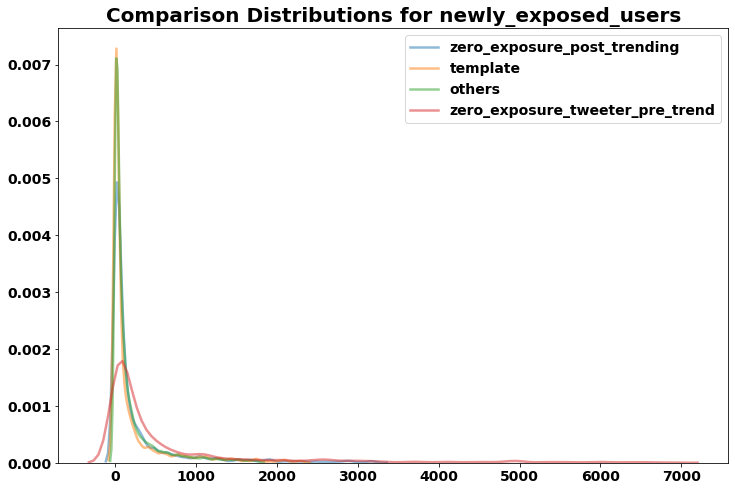

In [155]:
columns_to_display = ['newly_exposed_users']
for c in columns_to_display:
    quantile = .9
    for t in types:
        temper = temp[temp['label'] == t][c]
        sns.kdeplot(temper[temper < temper.quantile(quantile)], label=t,
                   alpha=.5)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


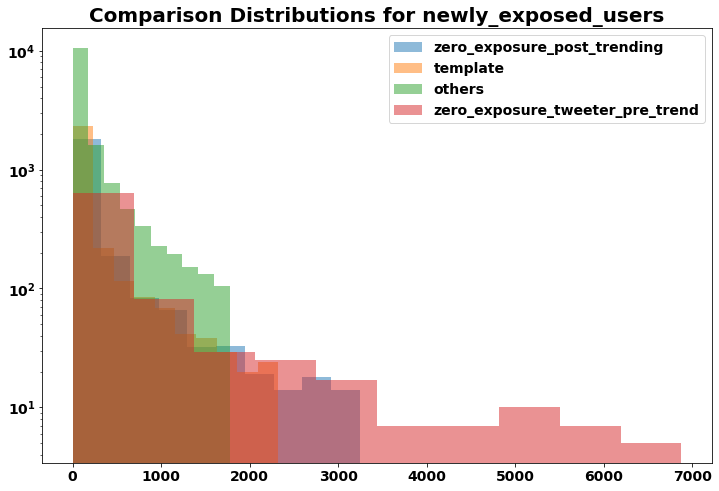

In [157]:
columns_to_display = ['newly_exposed_users']
for c in columns_to_display:
    quantile = .9
    for t in types:
        temper = temp[temp['label'] == t][c]
        plt.hist(temper[temper < temper.quantile(quantile)], label=t, alpha=.5, log=True)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

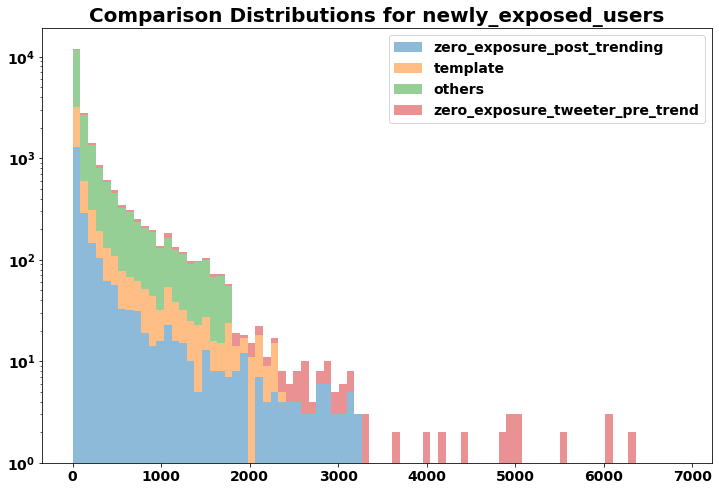

In [164]:
columns_to_display = ['newly_exposed_users']
for c in columns_to_display:
    quantile = .9
    to_plot = []
    for t in types:
        temper = temp[temp['label'] == t][c]
        to_plot.append(temper[temper < temper.quantile(quantile)])
    plt.hist(to_plot, label=types, alpha=.5, log=True, stacked=True, bins=80)
    
    plt.title('Comparison Distributions for ' + c)
    plt.legend()
    plt.show()

In [136]:
temp.indeg < temp.indeg.quantile(.95)

568      True
1167     True
1544     True
2107     True
6283    False
        ...  
3582     True
3858     True
118      True
704      True
1009     True
Name: indeg, Length: 5808, dtype: bool

(array([1.4738e+04, 2.2500e+02, 1.2000e+02, 1.0000e+01, 2.4000e+01,
        1.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00, 3.6800e+02]),
 array([    0.,  4910.,  9820., 14730., 19640., 24550., 29460., 34370.,
        39280., 44190., 49100.]),
 <BarContainer object of 10 artists>)

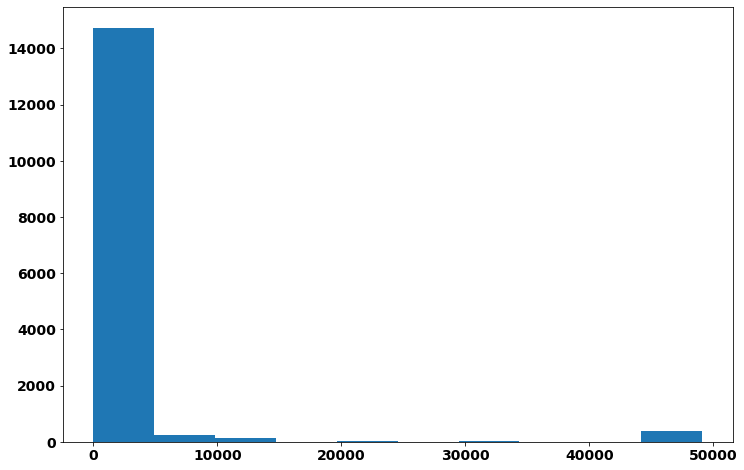

In [40]:
plt.hist(zero_exposure_tweeters.indeg)